In [1]:
import pandas as pd

In [2]:
pd.date_range('jan 01 2023', periods=12,freq='M')

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', freq='M')

In [4]:
df = pd.read_csv('Data_Set.csv')

In [8]:
df

,DATE,Stock market Price
0,1/1/2021 0:00,1773
1,1/1/2021 1:00,1244
2,1/1/2021 2:00,1126
3,1/1/2021 3:00,1250
4,1/1/2021 4:00,1614
...,...,...
163,1/7/2021 19:00,1176
164,1/7/2021 20:00,1905
165,1/7/2021 21:00,1447
166,1/7/2021 22:00,1879


In [11]:
df1 = df.set_index('DATE')

In [12]:
df1

,Stock market Price
DATE,
1/1/2021 0:00,1773
1/1/2021 1:00,1244
1/1/2021 2:00,1126
1/1/2021 3:00,1250
1/1/2021 4:00,1614
...,...
1/7/2021 19:00,1176
1/7/2021 20:00,1905
1/7/2021 21:00,1447


### ARIMA

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('Temp_Data.csv', index_col='DATE',parse_dates=True)

In [16]:
df

,Temp,relative_humidity,wind_speed,Pressure
DATE,,,,
2020-01-01,-0.44,86.0,18.5,100.15
2020-01-02,-0.09,79.0,14.0,100.47
2020-01-03,2.95,82.0,12.0,100.64
2020-01-04,-0.80,86.0,15.0,100.75
2020-01-05,-7.95,74.5,15.0,101.06
...,...,...,...,...
2021-06-03,18.55,83.5,12.0,101.14
2021-06-04,20.80,78.0,18.0,100.85
2021-06-05,22.75,71.5,13.5,100.76


In [17]:
df.index.freq = 'D'
df.dropna(inplace=True)

In [18]:
df.dropna(inplace=True)

In [19]:
df

,Temp,relative_humidity,wind_speed,Pressure
DATE,,,,
2020-01-01,-0.44,86.0,18.5,100.15
2020-01-02,-0.09,79.0,14.0,100.47
2020-01-03,2.95,82.0,12.0,100.64
2020-01-04,-0.80,86.0,15.0,100.75
2020-01-05,-7.95,74.5,15.0,101.06
...,...,...,...,...
2021-06-03,18.55,83.5,12.0,101.14
2021-06-04,20.80,78.0,18.0,100.85
2021-06-05,22.75,71.5,13.5,100.76


In [20]:
df = pd.DataFrame(df['Temp'])

In [21]:
df

,Temp
DATE,
2020-01-01,-0.44
2020-01-02,-0.09
2020-01-03,2.95
2020-01-04,-0.80
2020-01-05,-7.95
...,...
2021-06-03,18.55
2021-06-04,20.80
2021-06-05,22.75


<Axes: xlabel='DATE'>

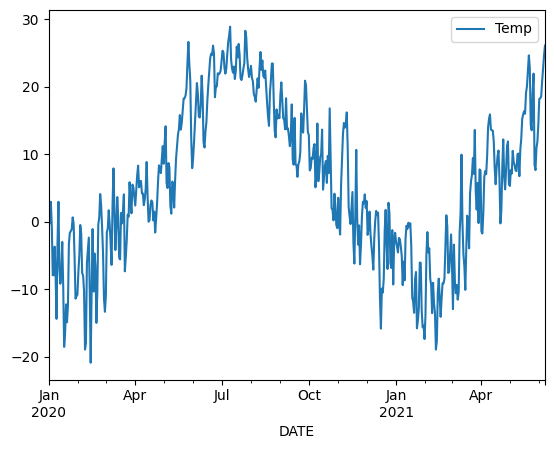

In [22]:
df.plot()

In [24]:
train = df.iloc[:510,0]

In [25]:
test = df.iloc[510:,0]

In [27]:
!python -m pip install statsmodels


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 11.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 7.8 MB/s eta 0:00:00


In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Axes: xlabel='DATE', ylabel='Resid'>

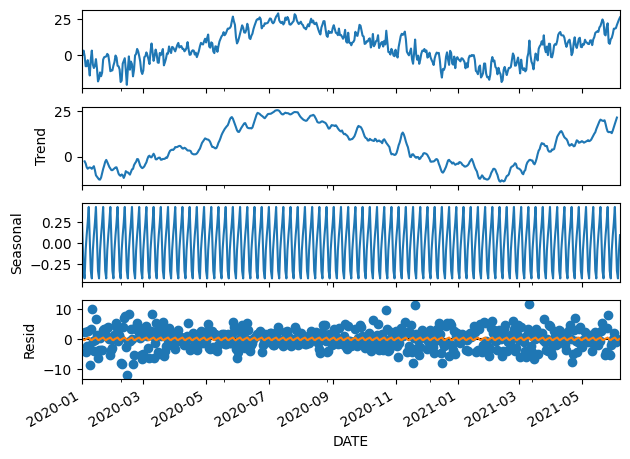

In [31]:
decompose_result = seasonal_decompose(df)
decompose_result.plot()
decompose_result.seasonal.plot()

<Axes: xlabel='DATE'>

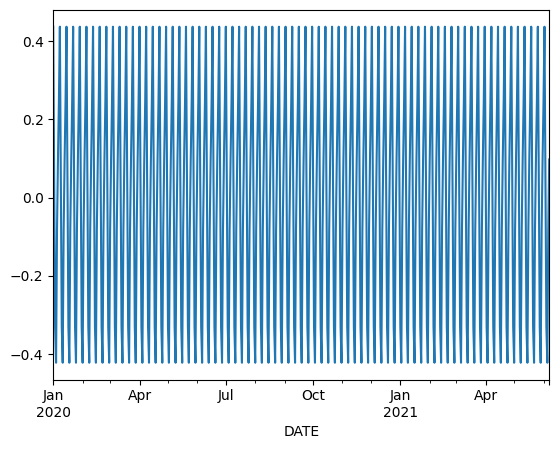

In [30]:
decompose_result.seasonal.plot()

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

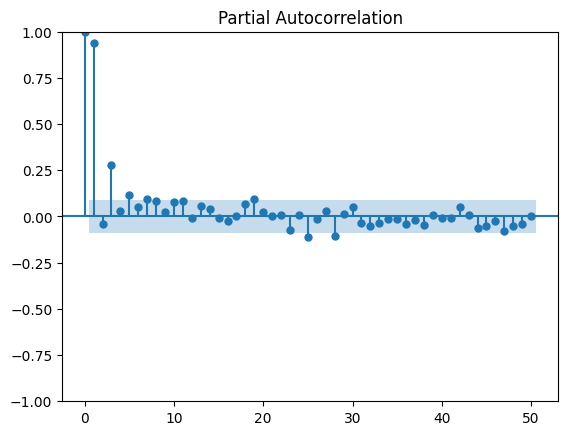

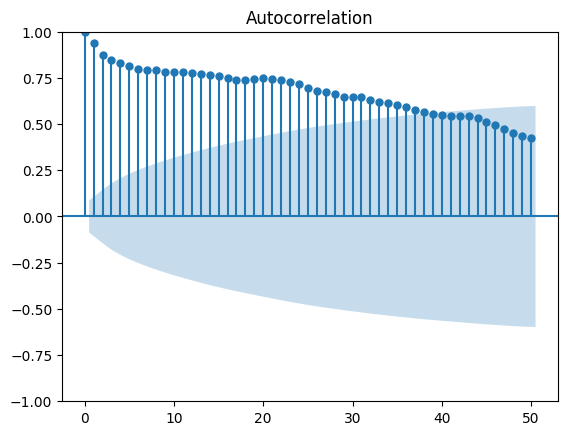

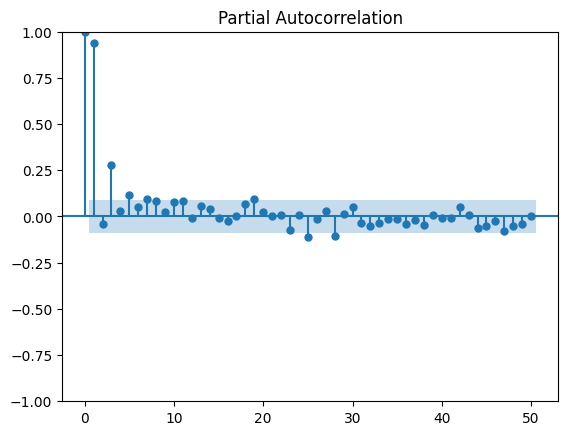

In [39]:
plot_acf(train,lags=50)
plot_pacf(train,lags=50)

In [40]:
!pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/7f/0f/4b0b7f6f363d8a6d92230be78d5a14a97834e29d24c9a264d24bb95a092d/pmdarima-2.0.4-cp39-cp39-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/de/08/98f58494beb69392491b688264ed08259ce453d624059dcefc3fe37e5b5d/Cython-3.0.6-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.4/630.4 kB 11.5 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 38.6 MB/s eta 0:00:00


In [41]:
from pmdarima import auto_arima
auto_arima(df,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2846.718, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2929.050, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2931.026, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2930.983, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2927.135, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2845.685, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2856.303, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2882.045, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2846.604, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2848.805, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2858.051, Time=0.06 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2848.587, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2844.520, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2854.723, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]          

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [46]:
# from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

A_model = sm.tsa.arima.ARIMA(train, order=(1,1,2))

predictor= A_model.fit()
predictor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Temp   No. Observations:                  510
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1378.671
Date:                Thu, 30 Nov 2023   AIC                           2765.341
Time:                        14:36:54   BIC                           2782.271
Sample:                    01-01-2020   HQIC                          2771.979
                         - 05-24-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3234      0.077      4.216      0.000       0.173       0.474
ma.L1         -0.3850      0.074     -5.223      0.000      -0.529      -0.240
ma.L2         -0.4007      0.046     -8.772      0.000      -0.490      -0.311
sigma2        13.1715      0.809     16.284      0.000      11.586      14.757
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.47
Prob(Q):                              0.88   Prob(JB):                         0.29
Heteroskedasticity (H):               1.03   Skew:                            -0.14
Prob(H) (two-sided):                  0.83   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
predicted_result = predictor.predict(start = len(train),end=len(train)+len(test)-1, typ = 'levels')

/Users/rajeshthakur/miniconda3/envs/transformers/lib/python3.9/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [48]:
predicted_result

2021-05-25    15.552138
2021-05-26    16.149253
2021-05-27    16.342371
2021-05-28    16.404828
2021-05-29    16.425028
2021-05-30    16.431561
2021-05-31    16.433674
2021-06-01    16.434358
2021-06-02    16.434579
2021-06-03    16.434650
2021-06-04    16.434673
2021-06-05    16.434681
2021-06-06    16.434683
2021-06-07    16.434684
Freq: D, Name: predicted_mean, dtype: float64

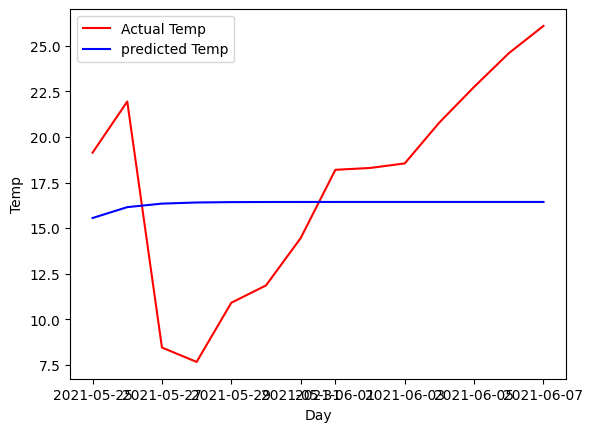

In [49]:
plt.plot(test,color='red',label='Actual Temp')
plt.plot(predicted_result,color='blue',label='predicted Temp')
plt.xlabel('Day')
plt.ylabel('Temp')
plt.legend()
plt.show()

In [50]:
test.mean()


17.40571428571429

In [51]:
predicted_result.mean()

16.341511563176155

In [52]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test,predicted_result))

In [53]:
rmse

5.801290359087896

### SARIMAX

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('Temp_Data.csv', index_col='DATE',parse_dates=True)

In [57]:
df.index.freq = 'D'
df.dropna(inplace=True)

<Axes: >

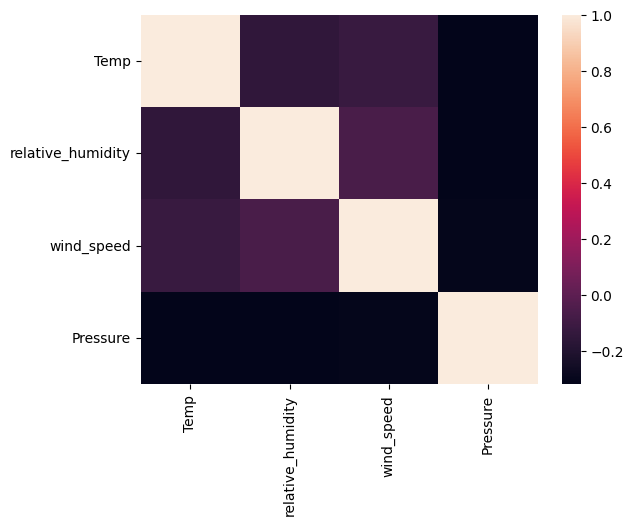

In [59]:
import seaborn as sn
sn.heatmap(df.corr())

In [60]:
train = df.iloc[:510,0]
test = df.iloc[510:,0]

In [61]:
exo = df.iloc[:,1:4]


In [63]:
exo_train = exo.iloc[:510]
exo_test = exo.iloc[510:]

In [64]:
exo_train

,relative_humidity,wind_speed,Pressure
DATE,,,
2020-01-01,86.0,18.5,100.15
2020-01-02,79.0,14.0,100.47
2020-01-03,82.0,12.0,100.64
2020-01-04,86.0,15.0,100.75
2020-01-05,74.5,15.0,101.06
...,...,...,...
2021-05-20,55.0,10.0,102.67
2021-05-21,55.5,11.5,102.51
2021-05-22,68.0,19.5,101.77


In [65]:
from pmdarima import auto_arima


In [70]:
auto_arima(df['Temp'],exogenous=exo, m=7, trace=True,D=1).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[7] intercept   : AIC=inf, Time=1.99 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=3496.256, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=3019.995, Time=0.33 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=3035.173, Time=0.21 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=3495.332, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=3188.466, Time=0.05 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=2962.667, Time=0.50 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=1.95 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=3320.661, Time=0.37 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=2954.772, Time=0.71 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=3003.837, Time=0.37 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=2925.714, Time=0.94 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=2923.819, Time=0.44 sec
 ARIMA(2,0,0)(0,1,1)[7] intercept   : AIC=inf, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  524
Model:             SARIMAX(2, 0, 1)x(1, 1, 1, 7)   Log Likelihood               -1447.346
Date:                           Thu, 30 Nov 2023   AIC                           2906.692
Time:                                   17:08:33   BIC                           2932.180
Sample:                               01-01-2020   HQIC                          2916.679
                                    - 06-07-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3000      0.128      2.336      0.019       0.048       0.552
ar.L2          0.4309      0.117      3.672      0.000       0.201       0.661
ma.L1          0.7082      0.112      6.348      0.000       0.490       0.927
ar.S.L7       -0.1025      0.054     -1.890      0.059      -0.209       0.004
ma.S.L7       -0.7775      0.040    -19.484      0.000      -0.856      -0.699
sigma2        15.5611      0.949     16.390      0.000      13.700      17.422
===================================================================================
Ljung-Box (L1) (Q):                   1.08   Jarque-Bera (JB):                12.11
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                            -0.33
Prob(H) (two-sided):                  0.94   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [67]:
decompose_result = seasonal_decompose(df['Temp'])

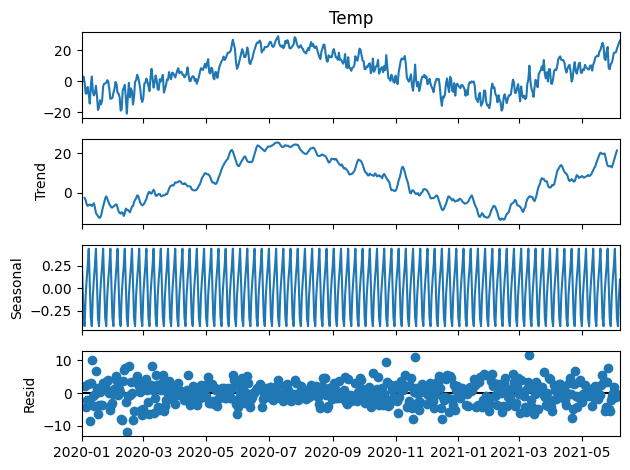

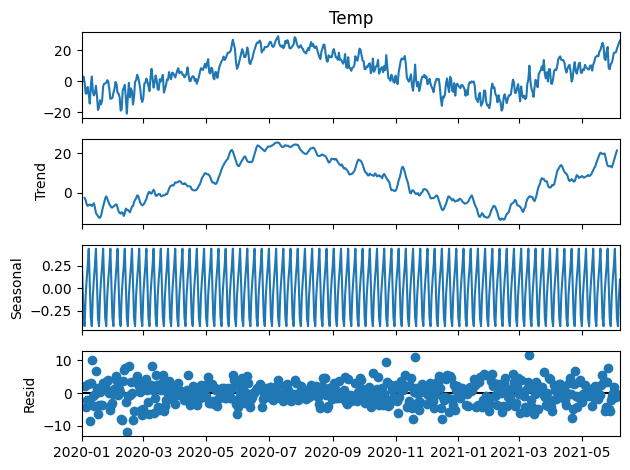

In [68]:
decompose_result.plot()

In [71]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [73]:
model = SARIMAX(train, exog=exo_train, order = (2,0,2),seasonal_order = (0,1,1,7))

In [74]:
model = model.fit()

/Users/rajeshthakur/miniconda3/envs/transformers/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/rajeshthakur/miniconda3/envs/transformers/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.21519D+00    |proj g|=  1.34707D+00

At iterate    5    f=  2.65425D+00    |proj g|=  7.97483D-02

At iterate   10    f=  2.57400D+00    |proj g|=  1.73569D-02

At iterate   15    f=  2.56812D+00    |proj g|=  8.37889D-03

At iterate   20    f=  2.56623D+00    |proj g|=  3.18154D-03

At iterate   25    f=  2.56151D+00    |proj g|=  1.20333D-01

At iterate   30    f=  2.55062D+00    |proj g|=  7.49089D-02

At iterate   35    f=  2.53838D+00    |proj g|=  8.05129D-02

At iterate   40    f=  2.53684D+00    |proj g|=  4.56197D-02

At iterate   45    f=  2.53522D+00    |proj g|=  3.33853D-02

At iterate   50    f=  2.53470D+00    |proj g|=  3.42705D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/rajeshthakur/miniconda3/envs/transformers/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [75]:
prediction = model.predict(len(train),len(train)+len(test)-1,exog=exo_test, typ = 'levels')

/Users/rajeshthakur/miniconda3/envs/transformers/lib/python3.9/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [76]:
prediction

2021-05-25    16.434408
2021-05-26    19.585349
2021-05-27    16.180954
2021-05-28    14.473950
2021-05-29    14.429376
2021-05-30    13.351471
2021-05-31    14.511363
2021-06-01    15.367300
2021-06-02    15.716520
2021-06-03    17.168830
2021-06-04    17.773647
2021-06-05    18.768959
2021-06-06    17.532922
2021-06-07    17.053273
Freq: D, Name: predicted_mean, dtype: float64

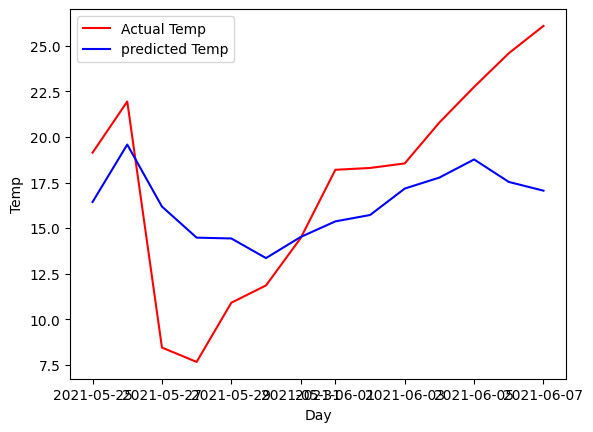

In [77]:
plt.plot(test,color='red',label='Actual Temp')
plt.plot(prediction,color='blue',label='predicted Temp')
plt.xlabel('Day')
plt.ylabel('Temp')
plt.legend()
plt.show()

In [78]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test,prediction))

In [79]:
rmse

4.686726636514739

In [80]:
!pwd

/Users/rajeshthakur/Desktop/synechron/projects/time-series/Source Codes
